<a href="https://colab.research.google.com/github/sinomorn/myspring/blob/master/tf_keras_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf


from tensorflow import keras


print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.2.0-rc2
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.2
pandas 1.0.3
sklearn 0.22.2.post1
tensorflow 2.2.0-rc2
tensorflow.keras 2.3.0-tf


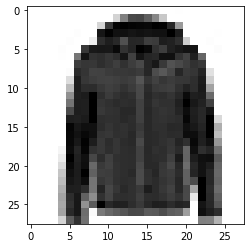

In [0]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_single_image(x_train[0])

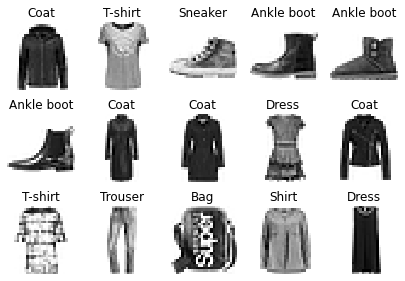

In [0]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)


In [0]:
# tf.keras.models.Sequential()

"""
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[] 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [0]:
model.layers

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
# [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300]
# 回调函数

In [31]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)



(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [40]:

from google.colab import files
files.download('./callbacks')

MessageError: ignored

In [32]:
#数据标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#x_train交给scaler归一前要[None,28,28]变成[None,784]
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
#fit_transform归一化时还会将训练集的均值和标准差保存在scaler里
#验证集和测试集的归一化也需要用训练集的均值和标准差
x_valid_scaled=scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

print(np.max(x_train_scaled),np.min(x_train_scaled)) 


2.0231433 -0.8105136


In [0]:
#训练添加回调函数
logDir="./callbacks"
if not os.path.exists(logDir):
  os.mkdir(logDir)
out_put_model_file=os.path.join(logDir,"fashion_minst_model.h5")
callbacks=[
           tf.keras.callbacks.TensorBoard(logDir),
           tf.keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3),
           tf.keras.callbacks.ModelCheckpoint(out_put_model_file,save_best_only=True)
]

In [34]:
history = model.fit(x_train_scaled, y_train, epochs=10,
                    validation_data=(x_valid_scaled, y_valid),callbacks=callbacks)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4556 - accuracy: 0.8321 - val_loss: 0.3915 - val_accuracy: 0.8554
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3514 - accuracy: 0.8697 - val_loss: 0.3562 - val_accuracy: 0.8748
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3166 - accuracy: 0.8824 - val_loss: 0.3223 - val_accuracy: 0.8858
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2933 - accuracy: 0.8903 - val_loss: 0.3028 - val_accuracy: 0.8890
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2743 - accuracy: 0.8967 - val_loss: 0.3105 - val_accuracy: 0.8870
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2583 - accuracy: 0.9028 - val_loss: 0.3218 - val_accuracy: 0.8814
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2442 - accuracy: 0.9079 - val_loss: 0.3258 - val_accuracy:

# 新段落

In [0]:
type(history)

tensorflow.python.keras.callbacks.History

In [0]:
history.history

{'accuracy': [0.7610727548599243,
  0.8200181722640991,
  0.8359454274177551,
  0.8443818092346191,
  0.8502181768417358,
  0.8567818403244019,
  0.8597090840339661,
  0.8661090731620789,
  0.8715999722480774,
  0.8720909357070923],
 'loss': [2.9156076908111572,
  0.5359029769897461,
  0.4771096110343933,
  0.4428311586380005,
  0.4205127954483032,
  0.3990824222564697,
  0.38546690344810486,
  0.3709523677825928,
  0.3546600639820099,
  0.3492709994316101],
 'val_accuracy': [0.8008000254631042,
  0.8133999705314636,
  0.8252000212669373,
  0.850600004196167,
  0.8578000068664551,
  0.8672000169754028,
  0.8677999973297119,
  0.8730000257492065,
  0.8704000115394592,
  0.8733999729156494],
 'val_loss': [0.6117971539497375,
  0.5689334869384766,
  0.5373086929321289,
  0.434848427772522,
  0.42316851019859314,
  0.38144829869270325,
  0.40929102897644043,
  0.37745997309684753,
  0.38166701793670654,
  0.379104882478714]}

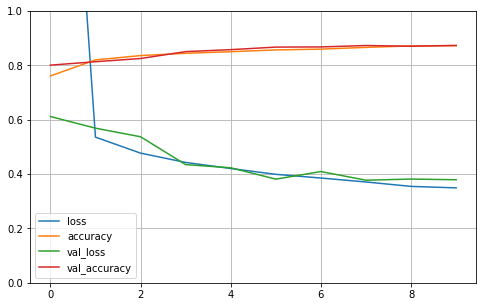

In [0]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

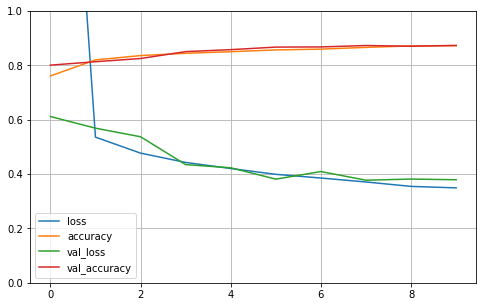

In [0]:
plot_learning_curves(history)

In [0]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4148 - accuracy: 0.8582


[0.4148058295249939, 0.8582000136375427]